# Calculating the Asset Swap Spread

The asset swap spread is widely used as measures of pure credit risk. In this notebook I calculate these quantities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.bonds import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



In [3]:
issueDate = FinDate(15, 5, 2000)
maturityDate = FinDate(15, 5, 2027)
coupon = 0.02375
freqType = FinFrequencyTypes.SEMI_ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA
faceAmount = 100.0 

In [4]:
bond = FinBond(issueDate, maturityDate, coupon, freqType, accrualType, faceAmount)

In [5]:
print(bond)

OBJECT TYPE: FinBond
ISSUE DATE: MON 15 MAY 2000
MATURITY DATE: SAT 15 MAY 2027
COUPON: 0.02375
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 100.0


## Asset Swap Spread

To calculate the asset swap spread we need a Libor reference curve. I just create a simple flat curve.

In [7]:
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat

In [8]:
liborFlatRate = 0.0275

In [9]:
settlementDate = FinDate(2017, 7, 21)

In [10]:
liborFlatCurve = FinDiscountCurveFlat(settlementDate, liborFlatRate, FinFrequencyTypes.SEMI_ANNUAL)

In [11]:
print(liborFlatCurve)

OBJECT TYPE: FinDiscountCurveFlat
FLAT RATE: 0.0275
FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
DAY COUNT: FinDayCountTypes.ACT_ACT_ISDA



To caluclate the ASW I need to know the clean price of the bond

In [12]:
cleanPrice = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

I then call a function passing in the date, price and curve

In [13]:
bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

-33.69913338080966

The bond ASW is negative so it is trading tighter than the Libor curve. I need to cheapen the bond to make the ASW positive.

In [14]:
cleanPrice = 93.382  # I specified face to be 100 

In [15]:
bond.assetSwapSpread(settlementDate, cleanPrice, liborFlatCurve) * 10000

38.48148022319349

To get date functionality you import FinDate

## Analysis of the Asset Swap Spread

We can use the vectorisations to do some basic analysis. First generate a vector of prices from 90 to 110 with 20 steps.

In [16]:
cleanPrices = np.linspace(75,125,20)

In [17]:
asws = bond.assetSwapSpread(settlementDate, cleanPrices, liborFlatCurve)

We can now plot the relationship.

Text(0, 0.5, 'Asset Swap Spread (bp)')

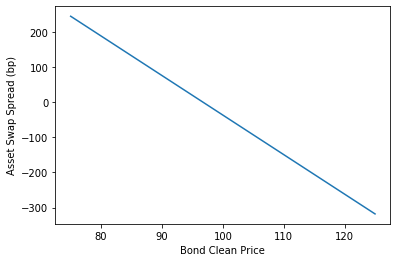

In [18]:
plt.plot(cleanPrices,asws*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("Asset Swap Spread (bp)")

This is nicely linear and decreasing - the higher the bond price the better its implied credit risk versus Libor discounting so the lower its asset swap spread.

Copyright (c) 2020 Dominic O'Kanem